# Car Price Prediction ML Model by using Heroku-Docker-GitHubActions
- From given data Predict the Selling Price of the car

In [1]:
#Lets Import the libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
#Lets load the dataset -
df = pd.read_csv('C:/Users/om/Desktop/17-ML-API-DockerHerokuGitAction-CarPrice/Cardata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#Lets take a look on categorical veriables -
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [7]:
#Lets convert categorical veriables into the numerical form -
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
df['Seller_Type'] = df['Seller_Type'].map({'Dealer':0,'Individual':1})
df['Transmission'] = df['Transmission'].map({'Manual':0,'Automatic':1})

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,0,0,0,0
1,93,2013,4.75,9.54,43000,1,0,0,0
2,68,2017,7.25,9.85,6900,0,0,0,0
3,96,2011,2.85,4.15,5200,0,0,0,0
4,92,2014,4.60,6.87,42450,1,0,0,0


In [9]:
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,0.371446,-0.829718,0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.371446,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,0.059855,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


In [10]:
#Lets Create an column of Numer of years i.e - Age of car -
df['Current_Year'] = 2023
df['Car_Age_in_years'] = df['Current_Year'] - df['Year']
df.drop(['Current_Year','Year','Car_Name'],axis=1,inplace=True) 
#Car_Name is very difficult to handle at the time of taking input from user as there are many unique values, so drop it-


In [11]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_in_years
0,3.35,5.59,27000,0,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,0,0,0,0,6
3,2.85,4.15,5200,0,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9


In [12]:
#Lets See the Correlation between the data -
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_in_years
Selling_Price,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
Car_Age_in_years,-0.236141,0.047584,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


<AxesSubplot:>

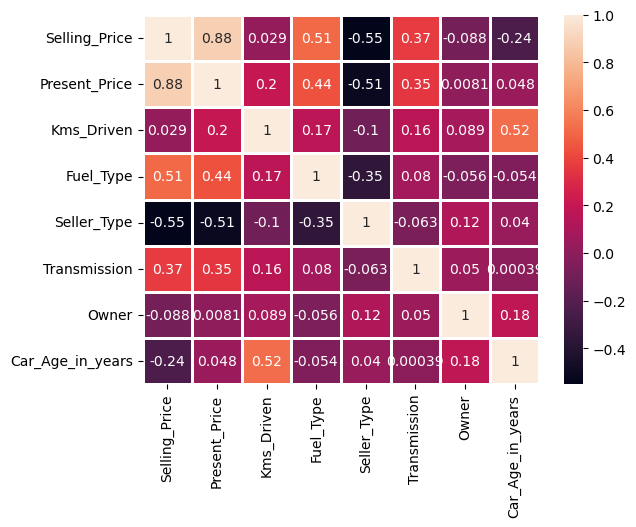

In [13]:
sns.heatmap(df.corr(),annot=True, linewidths=2,linecolor='white')

<AxesSubplot:>

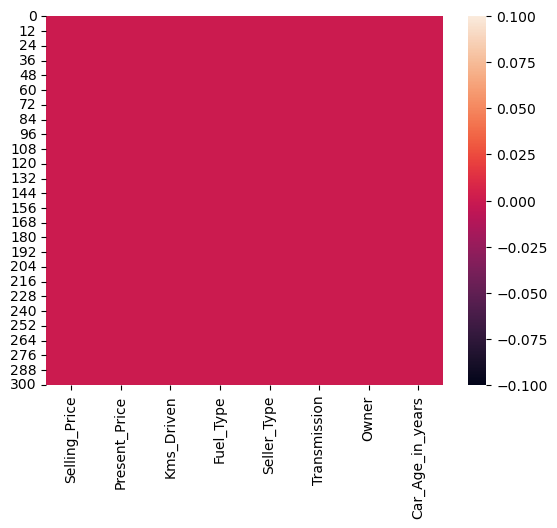

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_in_years
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189,9.372093
std,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000,11.000000
max,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000,20.000000


In [16]:
#lets Split the data in X & Y axis veriables -
x=df.iloc[:,1:]
y=df.iloc[:,0]

Text(0.5, 1.0, 'Petrol=0, Diesel=1, CNG=2')

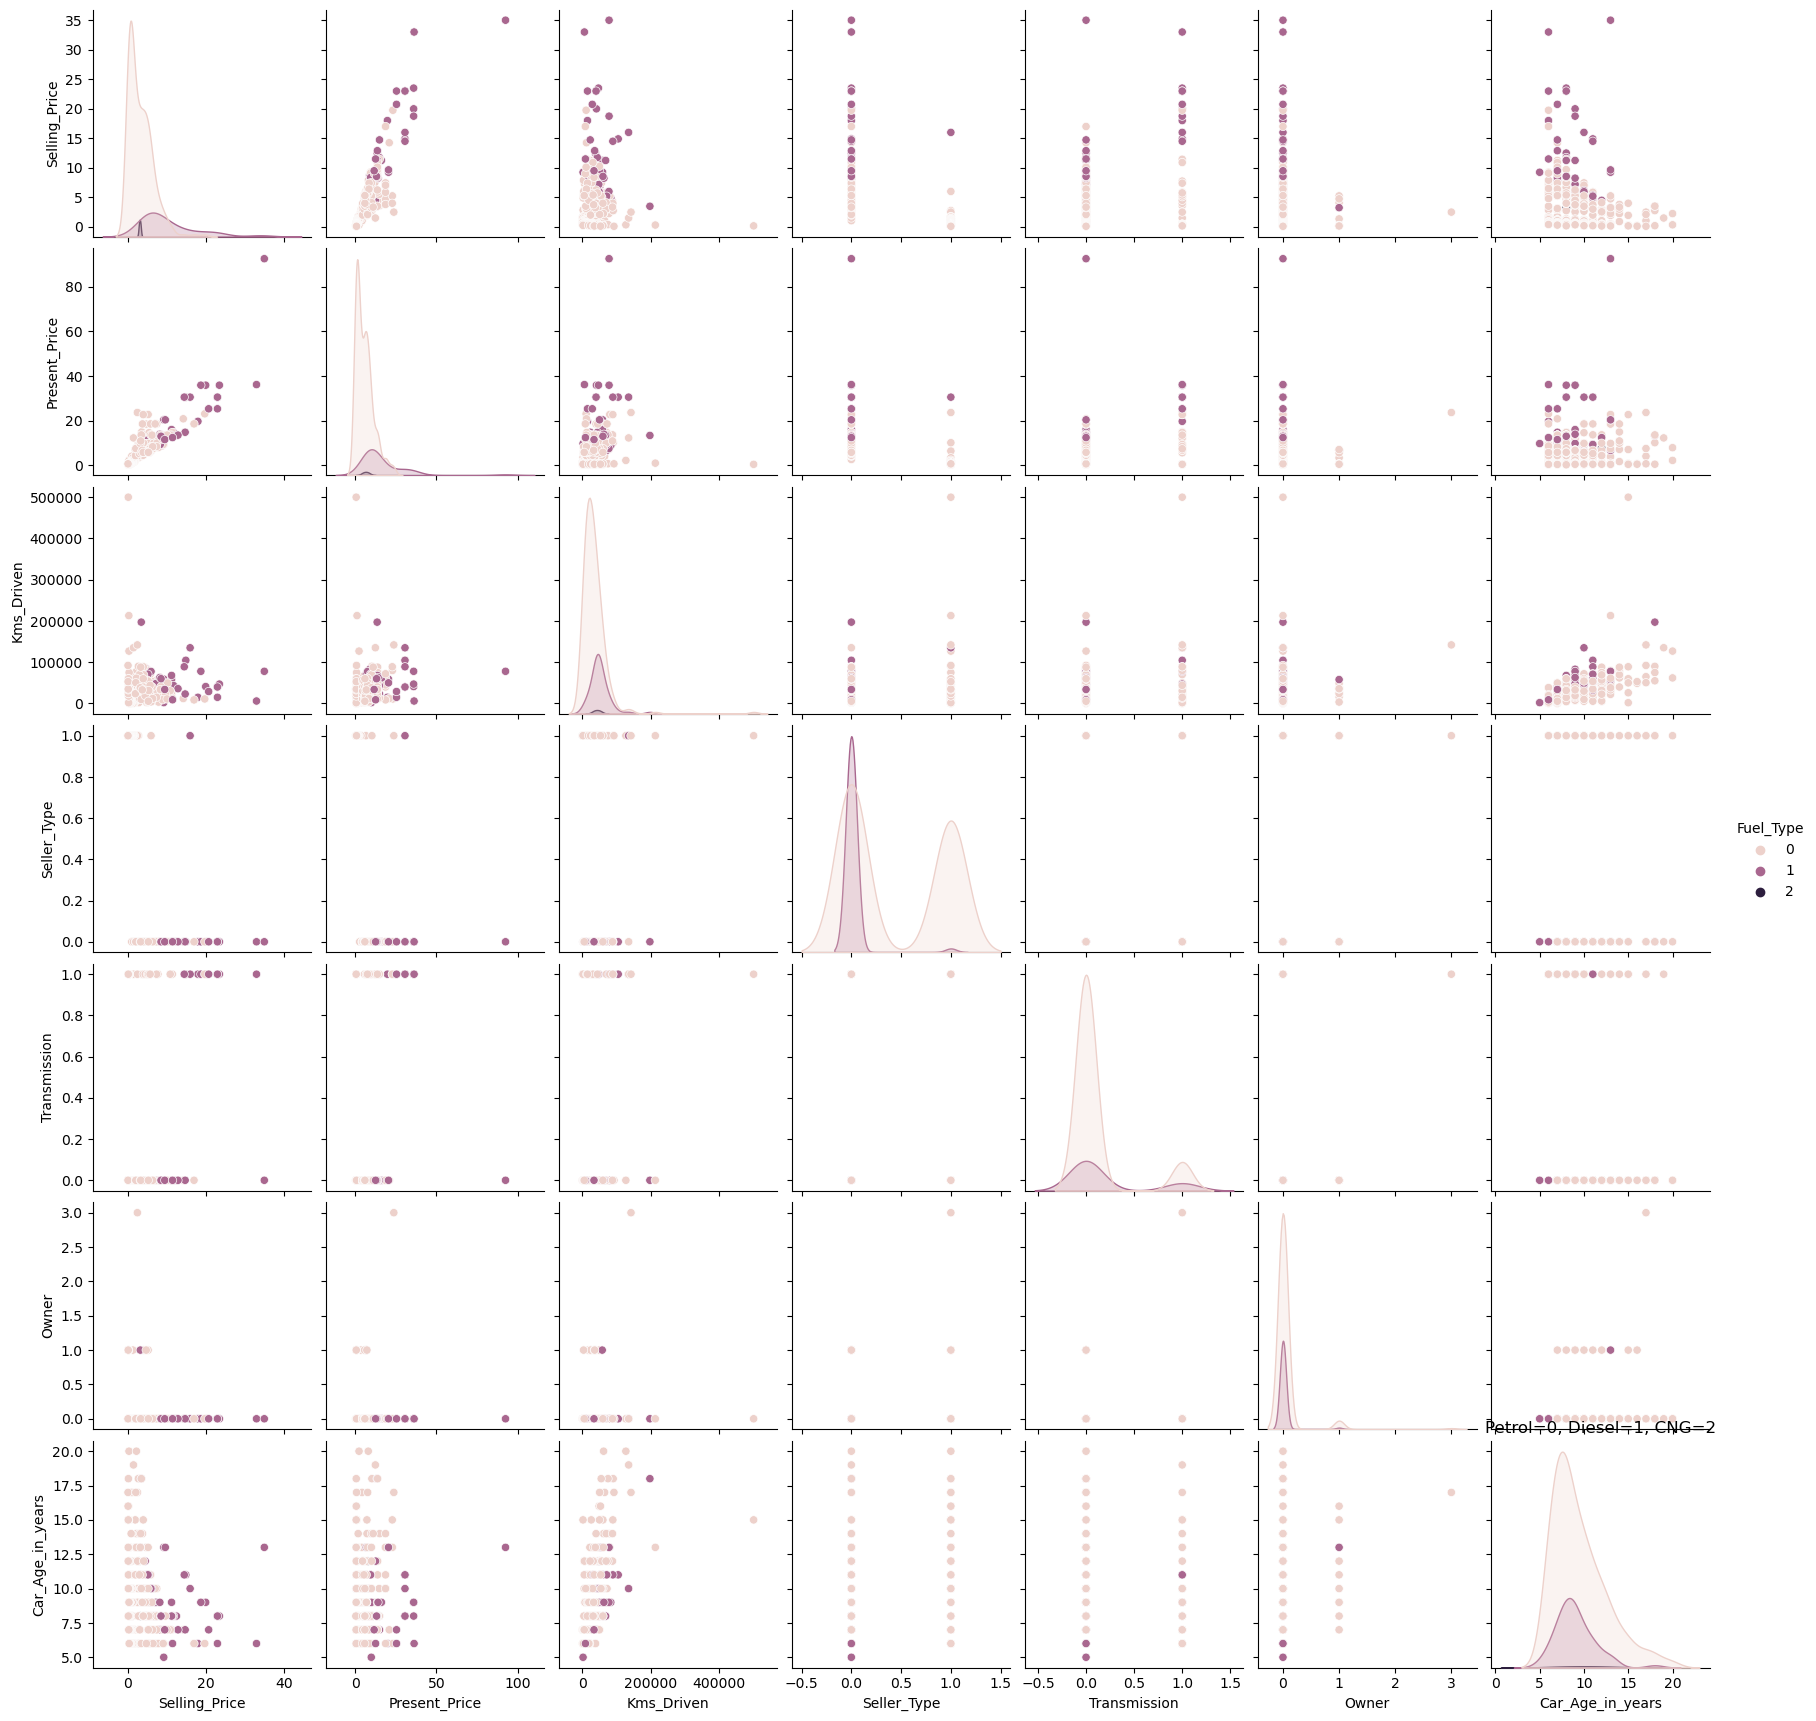

In [17]:
#Lets Visualize the results via plot -
sns.pairplot(df,hue='Fuel_Type')
plt.title("Petrol=0, Diesel=1, CNG=2")

In [18]:
#Lets do the Feature selection -
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x,y)

ExtraTreesRegressor()

In [19]:
print(etr.feature_importances_)

[0.42020227 0.04012285 0.14038344 0.23764154 0.0813219  0.00069656
 0.07963144]


[]

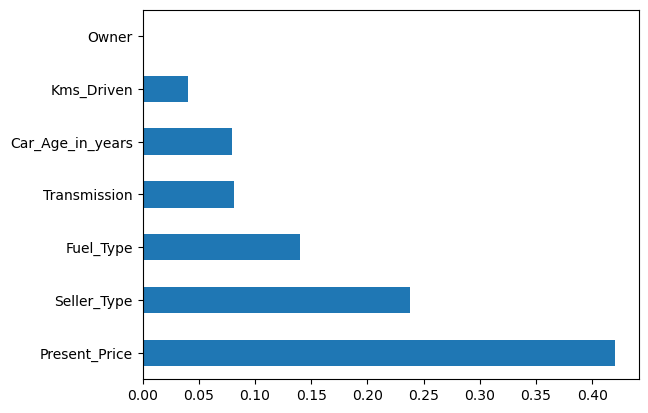

In [20]:
#Lets plot the feature importances for better understanding -
feat_importance = pd.Series(etr.feature_importances_,index=x.columns)
feat_importance.nlargest(7).plot(kind='barh')
plt.plot()

In [21]:
#Lets split the dataset in train_test_split parts -
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
#Lest Scale down the values for better results -
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Lets Save the Scalled/Transformed model -
joblib.dump(sc,'scalling_md17.pkl')

['scalling_md17.pkl']

In [24]:
#Lets create an object for the algorithm -
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [25]:
#Lets Do the Hyperparameters Tunning/Optimization -
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [26]:
#RandomizedSearchCV -
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest -
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split -
max_features = ['auto','sqrt']
#Maximum Number of levels in the tree - 
max_depth = [int(i) for i in np.linspace(5,30,num=6)]
#max_depthappend(None)
#Minimum number of samples required to split a node -
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node -
min_samples_leaf = [1,2,5,10]

In [27]:
#Lets Create an random Grid -
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
#Lets Create an object for the RandomizedSearchCV - (Randomsearch of parameters using 5 fold cross validation) -)
rfr_rscv = RandomizedSearchCV(estimator = rfr,param_distributions = random_grid,scoring = 'neg_mean_squared_error',n_iter = 10, cv=5,verbose=2,random_state=42,n_jobs=1)
rfr_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.3s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.5s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.4s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.7s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.7s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.7s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.8s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.0s
[CV] END max_depth=5, max_feat

C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.8s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.8s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s


C:\Users\om\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.7s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
#Lets see the best fitting parameters -
rfr_rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [30]:
#Lets see the best fitting parameters score -
rfr_rscv.best_score_

-4.117474763913149

In [31]:
#Lets Make an Prediction -
predict_rfr_rscv = rfr_rscv.predict((X_test))

C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

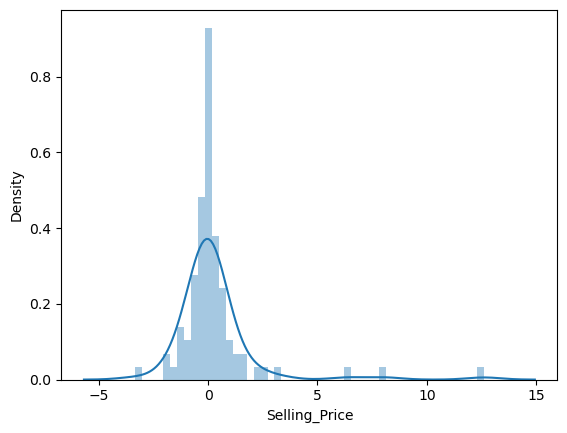

In [32]:
#Lets see the actual vs predicted results -
sns.distplot(y_test-predict_rfr_rscv)

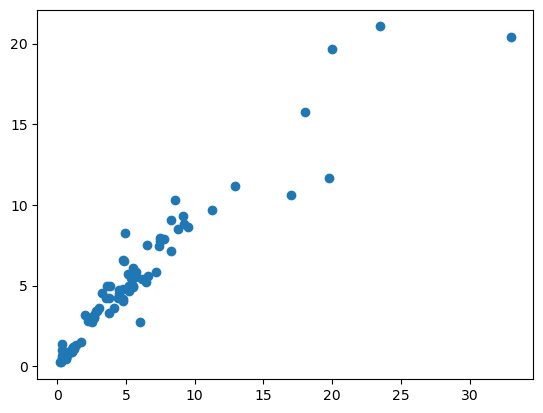

In [33]:
#Lets see the actual vs predicted results -
plt.scatter(y_test,predict_rfr_rscv)

In [34]:
#Lets evaluate the model -
from sklearn import metrics 
print('MAE:',metrics.mean_absolute_error(y_test,predict_rfr_rscv))
print('MSE:',metrics.mean_squared_error(y_test,predict_rfr_rscv))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predict_rfr_rscv)))
print('R2_score:',metrics.r2_score(y_test,predict_rfr_rscv))

MAE: 0.8639808791208741
MSE: 3.695311305169227
RMSE: 1.9223192516252932
R2_score: 0.8764360229356143


In [35]:
#Lets Make an prediction and see the Results here itself -
print(rfr_rscv.predict(sc.transform([[9.85,6900,0,0,0,0,6]])))
print(rfr_rscv.predict(sc.transform([[5.590,27000,0,0,0,0,9]])))

[7.53485]
[3.7934]


C:\Users\om\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\om\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
df.head(5)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_in_years
0,3.35,5.59,27000,0,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,0,0,0,0,6
3,2.85,4.15,5200,0,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9


In [37]:
#Lets Save the Training Model in pickle file -
joblib.dump(rfr_rscv,'train_md17.pkl')

['train_md17.pkl']

In [39]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

## Sample Inputes for Rest API - 
- [Actual:3.35] - {"data":  {"Present_Price":5.59,"Kms_Driven":27000,"Fuel_Type":0,"Seller_Type":0,"Transmission":0,"Owner":0,"Car_Age_in_years":9}}
- [Actual:7.25] -  {"data": {"Present_Price":9.85,"Kms_Driven":6900,"Fuel_Type":0,"Seller_Type":0,"Transmission":0,"Owner":0,"Car_Age_in_years":6}}
### Sample Input Format for Browser -
- Input Format - What is The Current Showroom Price in Lakhs (Ex- 5.54)
- Input Format - How Many Kilometers Drived? (Ex- 25000)
- Input Format - Fuel Type? (Ex- Petrol=0,Diesel=1,CNG=2,Battery=2)
- Input Format - Are You a Dealer/Individual? (Ex- Dealer=0,Individual=1)
- Input Format - What is The Transmission Type? (Ex- Manual=0,Automatic=1)
- Input Format - How many Owners Previously had the Car? (Ex- 0/1/2/3)
- Input Format - How Old Your Car is? (Current year- Manufacturing year)

### Lets Deploy the Model on Cloud by using Python-Flask-Docker-GitHubActions-Heroku -